# **Работа с данными студента**

In [1]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# проверка каталога
!ls

sample_data


In [4]:
#удаление дубликатов
!rm 1.txt

rm: cannot remove '1.txt': No such file or directory


In [11]:
#загрузка текстов студента в среду
from google.colab import files
uploaded = files.upload()

Saving 10.txt to 10.txt


In [12]:
#объединение  текстов в один массив данных

first = True
with open('stud.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(10, 11)])
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')

filename = 'stud.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
#print(text1)

#убираем гиперсылки
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

#print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Очистка текста Lowering the case, removing punctuations and numbers

#text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('№', '') #replacing hyphens with whitespace \t «
text_clean = text_clean.replace('–', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\t', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('«', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(':', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(';', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('*', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('•', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('#', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('»', '') #replacing hyphens with whitespace —
text_clean = text_clean.replace('—', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\xa0', ' ') #replacing hyphens with whitespace

table=str.maketrans('','',string.punctuation)
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)


text_lower2=text_lower.split(' ')
text_lower2
#len(text_lower2)



  Уильям Шекспир  


  Сон в летнюю ночь  


 William Shakespeare. A Midsummer Night's Dream




 ДЕЙСТВУЮЩИЕ ЛИЦА 


   Тезей  , герцог Афинский.
   Эгей  , отец Гермии.
   Лизандр, Деметрий  , влюбленные в Гермию.
   Филострат  , распорядитель увеселений при дворе Тезея.
   Пигва  , плотник.
   Миляга  , столяр.
   Основа  , ткач.
   Дудка  , починщик раздувальных мехов.
   Рыло  , медник.
   Заморыш  , портной.
   Ипполита  , царица амазонок, обрученная с Тезеем.
   Гермия  , влюбленная в Лизандра.
   Елена  , влюбленная в Деметрия.
   Оберон  , царь фей и эльфов.
   Титания  , царица фей и эльфов.
   Пэк, или Добрый Малый Робин  , маленький эльф.
   Душистый Горошек, Паутинка, Мотылек, Горчичное Зерно  , эльфы.
 Феи и эльфы, покорные Оберону и Титании, свита.
  Место действия — Афины и лес поблизости. 




  АКТ I  




 СЦЕНА 1  

  Афины, дворец Тезея. 
  Входят  Тезей ,  Ипполита ,  Филострат и  свита . 


 Тезей  

 Прекрасная, наш брачный час все ближе:
 Четыре дня счастливых 

['',
 '',
 'уильям',
 'шекспир',
 '',
 '',
 '',
 '',
 '',
 '',
 'сон',
 'в',
 'летнюю',
 'ночь',
 '',
 '',
 '',
 '',
 '',
 'william',
 'shakespeare',
 '',
 'a',
 'midsummer',
 'nights',
 'dream',
 '',
 '',
 '',
 '',
 '',
 'действующие',
 'лица',
 '',
 '',
 '',
 '',
 '',
 '',
 'тезей',
 '',
 '',
 'герцог',
 'афинский',
 '',
 '',
 '',
 '',
 'эгей',
 '',
 '',
 'отец',
 'гермии',
 '',
 '',
 '',
 '',
 'лизандр',
 'деметрий',
 '',
 '',
 'влюбленные',
 'в',
 'гермию',
 '',
 '',
 '',
 '',
 'филострат',
 '',
 '',
 'распорядитель',
 'увеселений',
 'при',
 'дворе',
 'тезея',
 '',
 '',
 '',
 '',
 'пигва',
 '',
 '',
 'плотник',
 '',
 '',
 '',
 '',
 'миляга',
 '',
 '',
 'столяр',
 '',
 '',
 '',
 '',
 'основа',
 '',
 '',
 'ткач',
 '',
 '',
 '',
 '',
 'дудка',
 '',
 '',
 'починщик',
 'раздувальных',
 'мехов',
 '',
 '',
 '',
 '',
 'рыло',
 '',
 '',
 'медник',
 '',
 '',
 '',
 '',
 'заморыш',
 '',
 '',
 'портной',
 '',
 '',
 '',
 '',
 'ипполита',
 '',
 '',
 'царица',
 'амазонок',
 'обрученная',
 'с',
 'т

In [13]:
#Токенизация текста
spec_chars = string.punctuation + '\n\xa0«»\t'
text_test = " ".join([ch for ch in text_lower2 if ch not in spec_chars])
#text_test

text_tokens = word_tokenize(text_test)
#text_tokens
#from nltk import word_tokenize
#nltk.download('punkt')
#sentences = [word.lower() for word in text_lower2 if re.match('^[а-яА-ЯёЁ]+', word)]


dftt = pd.DataFrame(text_tokens, columns=['Words'])
dftt = dftt.dropna(subset=['Words'])
#dftt
sentences=dftt['Words'].values.tolist()
text_tokens

['уильям',
 'шекспир',
 'сон',
 'в',
 'летнюю',
 'ночь',
 'william',
 'shakespeare',
 'a',
 'midsummer',
 'nights',
 'dream',
 'действующие',
 'лица',
 'тезей',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермии',
 'лизандр',
 'деметрий',
 'влюбленные',
 'в',
 'гермию',
 'филострат',
 'распорядитель',
 'увеселений',
 'при',
 'дворе',
 'тезея',
 'пигва',
 'плотник',
 'миляга',
 'столяр',
 'основа',
 'ткач',
 'дудка',
 'починщик',
 'раздувальных',
 'мехов',
 'рыло',
 'медник',
 'заморыш',
 'портной',
 'ипполита',
 'царица',
 'амазонок',
 'обрученная',
 'с',
 'тезеем',
 'гермия',
 'влюбленная',
 'в',
 'лизандра',
 'елена',
 'влюбленная',
 'в',
 'деметрия',
 'оберон',
 'царь',
 'фей',
 'и',
 'эльфов',
 'титания',
 'царица',
 'фей',
 'и',
 'эльфов',
 'пэк',
 'или',
 'добрый',
 'малый',
 'робин',
 'маленький',
 'эльф',
 'душистый',
 'горошек',
 'паутинка',
 'мотылек',
 'горчичное',
 'зерно',
 'эльфы',
 'феи',
 'и',
 'эльфы',
 'покорные',
 'оберону',
 'и',
 'титании',
 'свита',
 'место',
 'де

In [14]:
from google.colab import files
with pd.ExcelWriter('allstudentWords.xlsx') as writer:
    dftt.to_excel(writer, sheet_name='stud')
files.download('allstudentWords.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Лемматизация данных

In [15]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a2189f4b4fe0fa4ef9262afe4fe36175e4a0c585c8027322ce3f7d5c229fdd5d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [16]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = sentences
normal_text=[]
for word in words:
    p = morph.parse(word)[0]
    normal_text.append(p.normal_form)
    #print(p.normal_form)
normal_text

['уильям',
 'шекспир',
 'сон',
 'в',
 'летний',
 'ночь',
 'william',
 'shakespeare',
 'a',
 'midsummer',
 'nights',
 'dream',
 'действовать',
 'лицо',
 'тезь',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермия',
 'лизандра',
 'деметрия',
 'влюбить',
 'в',
 'гермия',
 'филострата',
 'распорядитель',
 'увеселение',
 'при',
 'двор',
 'тезея',
 'пигва',
 'плотник',
 'миляга',
 'столяр',
 'основа',
 'ткач',
 'дудка',
 'починщик',
 'раздувальный',
 'мех',
 'рыло',
 'медник',
 'заморыш',
 'портной',
 'ипполит',
 'царица',
 'амазонка',
 'обручить',
 'с',
 'тезеть',
 'гермия',
 'влюбить',
 'в',
 'лизандра',
 'елена',
 'влюбить',
 'в',
 'деметрия',
 'оберон',
 'царь',
 'фея',
 'и',
 'эльф',
 'титаний',
 'царица',
 'фея',
 'и',
 'эльф',
 'пэк',
 'или',
 'добрый',
 'малый',
 'робин',
 'маленький',
 'эльф',
 'душистый',
 'горошек',
 'паутинка',
 'мотылёк',
 'горчичный',
 'зерно',
 'эльф',
 'фея',
 'и',
 'эльф',
 'покорный',
 'оберон',
 'и',
 'титаний',
 'свита',
 'место',
 'действие',
 'афины',
 '

In [17]:
#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in normal_text if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

# Подготовка данных к частотной токенизации, разбиение данных на равное количество символов

Mapping words from first 5000 lines using mapper 1 in list 1

In [18]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [19]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [20]:
print(list1)

[('уильям', 1), ('шекспир', 1), ('сон', 1), ('летний', 1), ('ночь', 1), ('william', 1), ('shakespeare', 1), ('midsummer', 1), ('nights', 1), ('dream', 1), ('действовать', 1), ('лицо', 1), ('тезь', 1), ('герцог', 1), ('афинский', 1), ('эгей', 1), ('отец', 1), ('гермия', 1), ('лизандра', 1), ('деметрия', 1), ('влюбить', 1), ('гермия', 1), ('филострата', 1), ('распорядитель', 1), ('увеселение', 1), ('при', 1), ('двор', 1), ('тезея', 1), ('пигва', 1), ('плотник', 1), ('миляга', 1), ('столяр', 1), ('основа', 1), ('ткач', 1), ('дудка', 1), ('починщик', 1), ('раздувальный', 1), ('мех', 1), ('рыло', 1), ('медник', 1), ('заморыш', 1), ('портной', 1), ('ипполит', 1), ('царица', 1), ('амазонка', 1), ('обручить', 1), ('тезеть', 1), ('гермия', 1), ('влюбить', 1), ('лизандра', 1), ('елена', 1), ('влюбить', 1), ('деметрия', 1), ('оберон', 1), ('царь', 1), ('фея', 1), ('эльф', 1), ('титаний', 1), ('царица', 1), ('фея', 1), ('эльф', 1), ('пэк', 1), ('или', 1), ('добрый', 1), ('малый', 1), ('робин', 1),

In [21]:
print(list2)

[('иль', 1), ('смерть', 1), ('всегда', 1), ('грозить', 1), ('любовь', 1), ('делать', 1), ('она', 1), ('как', 1), ('звук', 1), ('мгновенный', 1), ('как', 1), ('тень', 1), ('летучий', 1), ('как', 1), ('сон', 1), ('короткий', 1), ('так', 1), ('молния', 1), ('блеснуть', 1), ('мрак', 1), ('ночь', 1), ('разверзнуть', 1), ('гневно', 1), ('небо', 1), ('земля', 1), ('ранний', 1), ('чем', 1), ('воскликнуть', 1), ('смотреть', 1), ('она', 1), ('уже', 1), ('поглотить', 1), ('бездна', 1), ('мрак', 1), ('всё', 1), ('яркий', 1), ('так', 1), ('быстро', 1), ('исчезать', 1), ('гермия', 1), ('если', 1), ('для', 1), ('влюбить', 1), ('неизбежно', 1), ('страдание', 1), ('таков', 1), ('закон', 1), ('судьба', 1), ('так', 1), ('быть', 1), ('испытание', 1), ('терпеливый', 1), ('ведь', 1), ('это', 1), ('для', 1), ('любовь', 1), ('обычный', 1), ('крест', 1), ('приличный', 1), ('она', 1), ('мечта', 1), ('томление', 1), ('слеза', 1), ('желание', 1), ('сон', 1), ('любовь', 1), ('несчастный', 1), ('свита', 1), ('лизан

Merging the two lists

In [22]:
final_list = list1+list2

# Sorting

Sorting the list alphabetically in ascending order

In [23]:
final_list.sort()

In [24]:
len(final_list)

13152

In [25]:
final_list[0]

('', 1)

In [26]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [27]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [28]:
len(map1)

13151

In [29]:
len(map2)

0

In [30]:
print(map1)

[('corona', 1), ('cuckold', 1), ('cuckoo', 1), ('days', 1), ('dream', 1), ('england', 1), ('golden', 1), ('iii', 1), ('merry', 1), ('midsummer', 1), ('nights', 1), ('shakespeare', 1), ('veneris', 1), ('william', 1), ('xop', 1), ('xop', 1), ('аврор', 1), ('аврор', 1), ('аврора', 1), ('автор', 1), ('автор', 1), ('ага', 1), ('адья', 1), ('адья', 1), ('адья', 1), ('айайайайайать', 1), ('акт', 1), ('акт', 1), ('акт', 1), ('акт', 1), ('акт', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('актёр', 1), ('алей', 1), ('алеть', 1), ('алтарь', 1), ('алый', 1), ('алым', 1), ('альманах', 1), ('альманах', 1), ('альманах', 1), ('амазонка', 1), ('амазонка', 1), ('амазонка', 1), ('амазонка', 1), ('амазонка', 1), ('амазонка', 1), ('аминь', 1), ('аминь', 1), ('анализ', 1), ('анахронизм', 1), ('ангел', 1), ('английский', 1), ('английский', 1), ('английский', 1), ('англ

In [31]:
print(map2)

[]


# Reducer

Defining the reducer function

In [32]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [33]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [34]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [35]:
list3 = reduce1(map1)

Reducing the second n-z list

In [36]:
list4 = reduce2(map2)

Merging the two reduced lists

In [37]:
answer_list = list3 + list4
print(answer_list)

[('corona', 1), ('cuckold', 1), ('cuckoo', 1), ('days', 1), ('dream', 1), ('england', 1), ('golden', 1), ('iii', 1), ('merry', 1), ('midsummer', 1), ('nights', 1), ('shakespeare', 1), ('veneris', 1), ('william', 1), ('xop', 2), ('аврор', 2), ('аврора', 1), ('автор', 2), ('ага', 1), ('адья', 3), ('айайайайайать', 1), ('акт', 5), ('актёр', 14), ('алей', 1), ('алеть', 1), ('алтарь', 1), ('алый', 1), ('алым', 1), ('альманах', 3), ('амазонка', 6), ('аминь', 2), ('анализ', 1), ('анахронизм', 1), ('ангел', 1), ('английский', 11), ('аникст', 1), ('антиопа', 1), ('антиопу', 1), ('антипод', 1), ('античный', 2), ('анютин', 1), ('аполлон', 1), ('ариадна', 2), ('аромат', 2), ('ароматный', 1), ('арфа', 1), ('архаичный', 1), ('ассирийский', 1), ('ассирия', 1), ('астрологический', 1), ('астрономический', 1), ('афинский', 18), ('афины', 23), ('афинянин', 2), ('афинянка', 1), ('афродита', 1), ('ахерон', 1), ('бай', 11), ('баллада', 3), ('баловать', 1), ('бант', 1), ('басня', 1), ('батюшка', 1), ('башка'

# Final Dataframe

In [38]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

,Word,Frequency
0,corona,1
1,cuckold,1
2,cuckoo,1
3,days,1
4,dream,1
...,...,...
3662,ярмо,2
3663,ясно,3
3664,ясный,3
3665,ято,1


In [43]:
print(df.to_string())

                    Word  Frequency
0                 corona          1
1                cuckold          1
2                 cuckoo          1
3                   days          1
4                  dream          1
5                england          1
6                 golden          1
7                    iii          1
8                  merry          1
9              midsummer          1
10                nights          1
11           shakespeare          1
12               veneris          1
13               william          1
14                   xop          2
15                 аврор          2
16                аврора          1
17                 автор          2
18                   ага          1
19                  адья          3
20         айайайайайать          1
21                   акт          5
22                 актёр         14
23                  алей          1
24                 алеть          1
25                алтарь          1
26                  алый    

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       3667 non-null   object
 1   Frequency  3667 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.4+ KB


In [40]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

,Word,Frequency
3560,что,261
1788,она,195
210,быть,173
1068,как,147
1789,они,133
...,...,...
1612,неожиданный,1
1613,неповинный,1
1614,неповторимый,1
1615,неподалёку,1


# EN

In [41]:
!rm stop-words_en.xlsx

rm: cannot remove 'stop-words_en.xlsx': No such file or directory


In [44]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words_en.xlsx to stop-words_en.xlsx


In [45]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

Unnamed: 0    179
0             179
dtype: int64


In [47]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.count())
#убираем слова-стоп
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.stop_en)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_11'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)


#df2=df1[df1['Word'].map(len) > 3]

Unnamed: 0    179
stop_en       179
dtype: int64
     WordStudent_11  Frequency
0               что        261
1               она        195
2              быть        173
3               как        147
4               они        133
...             ...        ...
3662           семь          1
3663     сдвинуться          1
3664           сень          1
3665      сердиться          1
3666          ёмкий          1

[3667 rows x 2 columns]
WordStudent_11    3667
Frequency         3667
dtype: int64


# RU

In [67]:
from google.colab import files
uploaded = files.upload()

Saving stop-words-ru.xlsx to stop-words-ru.xlsx


In [82]:
df_stop= pd.read_excel("stop-words-ru.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_ru'}, inplace=True)
print(df_stop.count())

Unnamed: 0    151
stop_ru       151
dtype: int64


In [84]:
df_student=df_student_clear2
# df_student_clear=df_student[~df_student.WordStudent_5.isin(df_stop.stop_ru)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_1'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

     WordStudent_11  Frequency
0               что        261
1               она        195
2              быть        173
3               как        147
4               они        133
...             ...        ...
3662           семь          1
3663     сдвинуться          1
3664           сень          1
3665      сердиться          1
3666          ёмкий          1

[3667 rows x 2 columns]
WordStudent_11    3667
Frequency         3667
dtype: int64


# PLOT

<ipython-input-85-c2de94caeb8c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_11'],rotation=75)


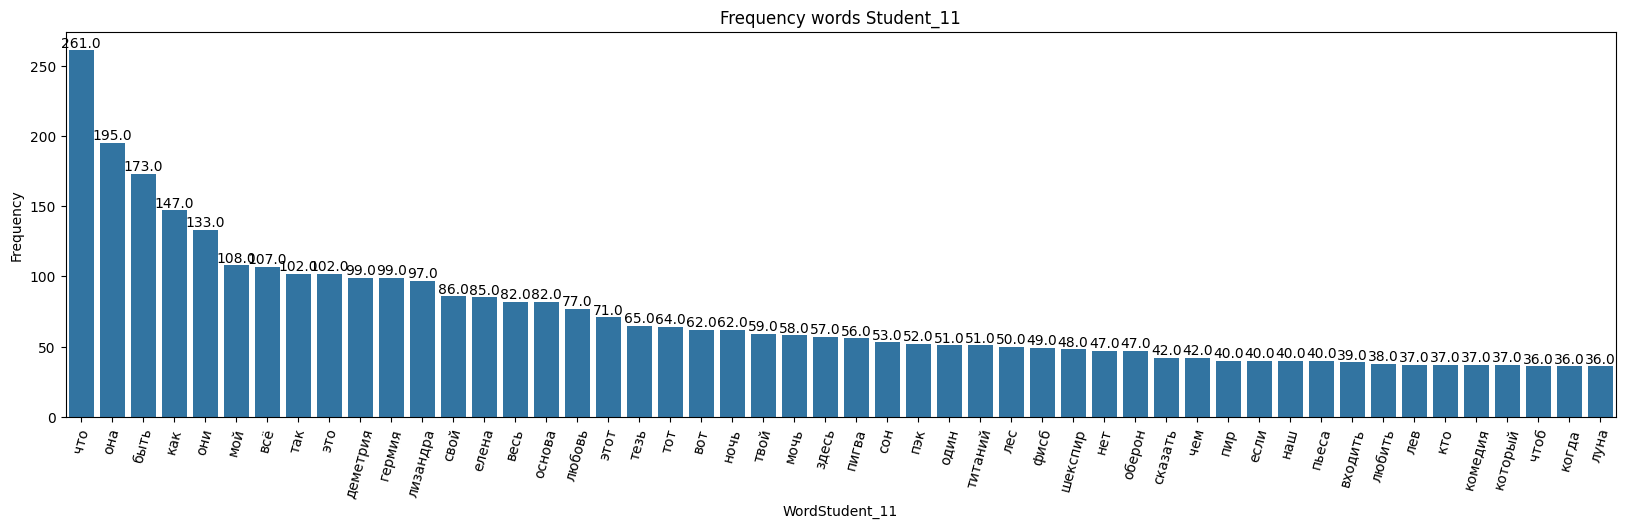

In [85]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_11',y='Frequency',data=df_student_clear2.head(50))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_11'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_11")
#setting the Y-axis labels
ax.set_ylabel("Frequency")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [86]:
from google.colab import files
with pd.ExcelWriter('outputStudents.xlsx') as writer:
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_11')
files.download('outputStudents.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
!ls

 10.txt				   rezult.xlsx
 1.txt				   sample_data
 allstudentWords.xlsx		   stop-words_en.xlsx
 outputStudents.xlsx		   stop-words-ru.xlsx
'outputTeacherW_Reduce (1).xlsx'   stud.txt
 outputTeacherW_Reduce.xlsx	  "William Shakespeare. A Midsummer Night's Dream.txt"


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [114]:
!rm Analise_Осокин.xlsx

rm: cannot remove 'Analise_Осокин.xlsx': No such file or directory


In [111]:
from google.colab import files
uploaded = files.upload()

Saving outputTeacherW_Reduce.xlsx to outputTeacherW_Reduce (1).xlsx


In [116]:
df_teach = pd.read_excel("outputTeacherW_Reduce.xlsx", 'TeacerWords')
# df_teach
# print(df_teach)
print(df_teach.count())

Unnamed: 0       3536
KorpusBosenko    3536
Frequency        3536
dtype: int64


In [115]:
df_stud = pd.read_excel("outputStudents.xlsx", 'outputStudent_11')
#print(df_stud)
print(df_stud.count())

Unnamed: 0        3667
WordStudent_11    3667
Frequency         3667
dtype: int64


In [117]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_11.isin(df_teach.KorpusBosenko)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_11':'WordSt_11Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_11'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

      Unnamed: 0 WordSt_11Tch  FrSt_11
0           3666        ёмкий        1
1            791        ясный        3
2            751         ясно        3
3           1242         ярмо        2
4           3123         ярко        1
...          ...          ...      ...
3505         760         адья        3
3506        2091          ага        1
3507        1227        автор        2
3508        2092       аврора        1
3509        1229        аврор        2

[3510 rows x 3 columns]
Unnamed: 0      3510
WordSt_11Tch    3510
FrSt_11         3510
dtype: int64


In [122]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusBosenko.isin(df_stud.WordStudent_11)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusBosenko':'WordSt_11Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

      Unnamed: 0 WordSt_11Tch  FrTch
0           3535        ёмкий      1
1            576        ясный      4
2            711         ясно      3
3           1146         ярмо      2
4           2550         ярко      1
...          ...          ...    ...
3505         710         адья      3
3506        1947          ага      1
3507        1158        автор      2
3508        1622       аврора      1
3509        2898        аврор      1

[3510 rows x 3 columns]
Unnamed: 0      3510
WordSt_11Tch    3510
FrTch           3510
dtype: int64


In [123]:
df_teach_ok_1=df_teach_ok
df_teach_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_teach_ok_1

,WordSt_11Tch,FrTch
0,всё,108
1,это,102
2,деметрия,99
3,гермия,99
4,лизандра,97
...,...,...
3505,сопровождаться,1
3506,спутник,1
3507,сравнительно,1
3508,сравнительный,1


In [124]:
df_student_ok_1=df_student_ok
df_student_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_student_ok_1

,WordSt_11Tch,FrSt_11
0,всё,107
1,это,102
2,деметрия,99
3,гермия,99
4,лизандра,97
...,...,...
3505,семь,1
3506,сдвинуться,1
3507,сень,1
3508,сердиться,1


In [125]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res

,WordSt_11Tch,FrTch,FrSt_11
0,всё,108,107
1,это,102,102
2,деметрия,99,99
3,гермия,99,99
4,лизандра,97,97
...,...,...,...
3505,сопровождаться,1,1
3506,спутник,1,1
3507,сравнительно,1,1
3508,сравнительный,1,1


In [126]:
#Объединяем частоты студента и преподавателя
res = df_student_ok.merge(df_teach_ok)
res

,WordSt_11Tch,FrSt_11,FrTch
0,всё,107,108
1,это,102,102
2,деметрия,99,99
3,гермия,99,99
4,лизандра,97,97
...,...,...,...
3505,семь,1,1
3506,сдвинуться,1,1
3507,сень,1,1
3508,сердиться,1,1


In [127]:
from google.colab import files
with pd.ExcelWriter('rezult.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
x=res['WordSt_11Tch'].values.tolist()

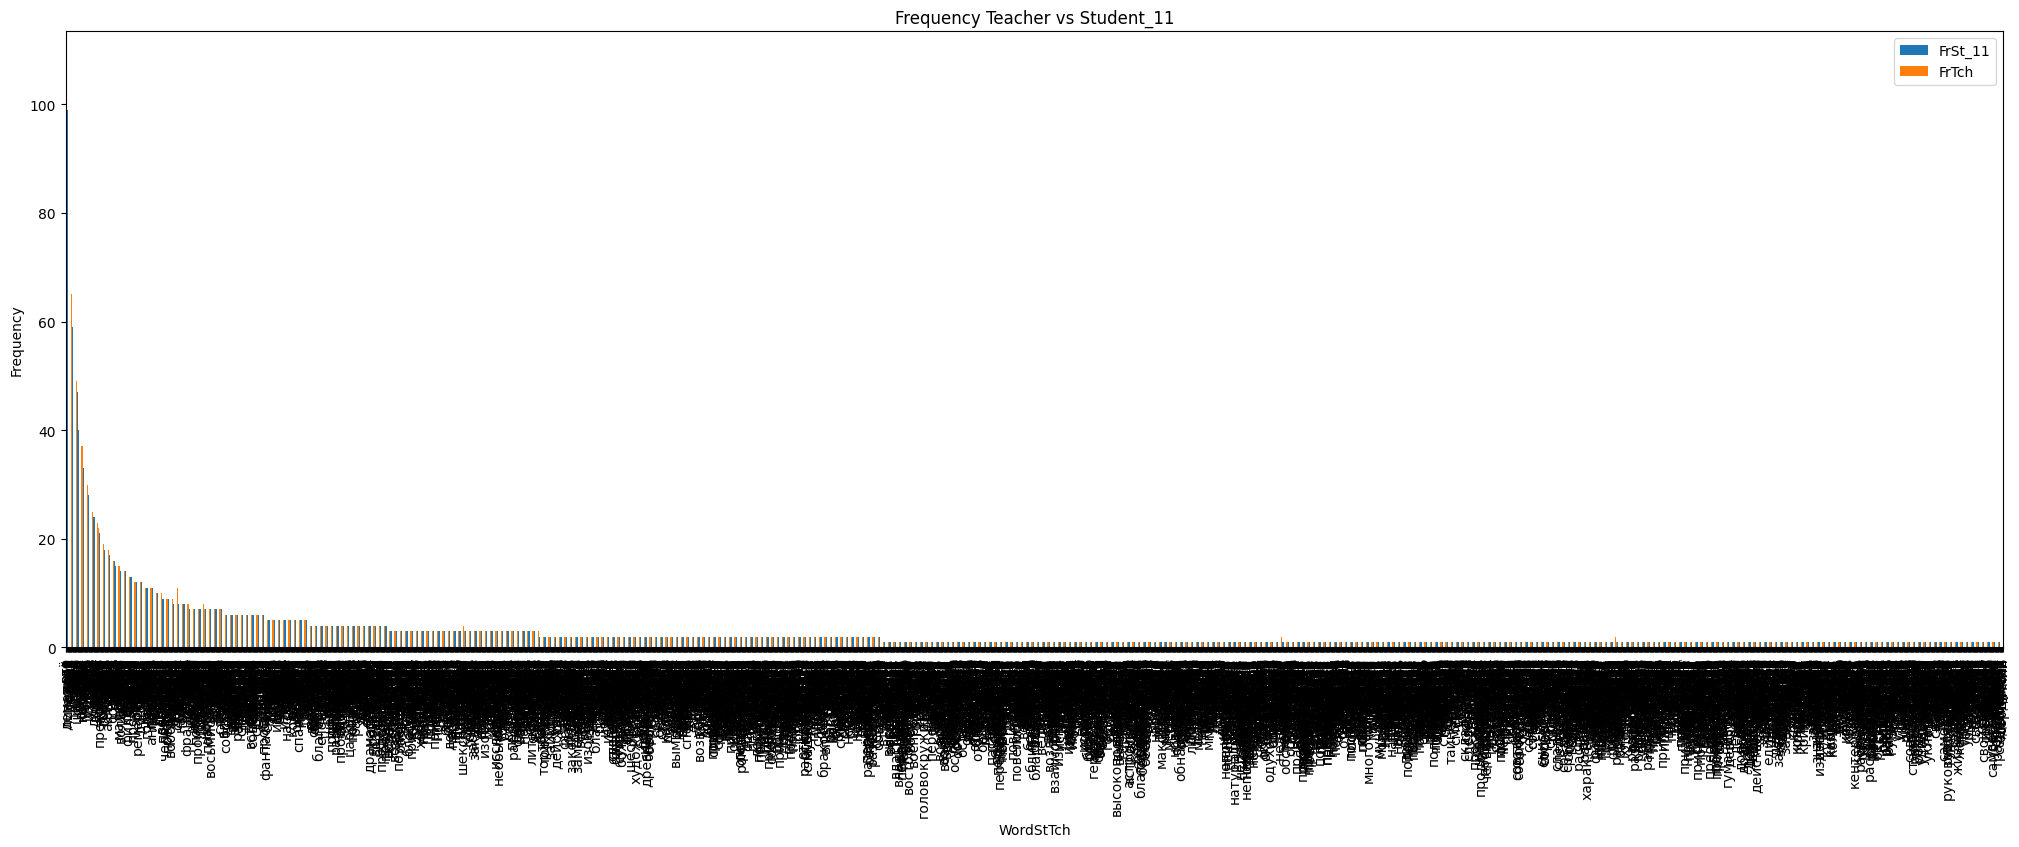

In [129]:
res.plot(kind='bar', figsize=(25,8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Frequency Teacher vs Student_11")
plt.xticks(x_pos, x)
plt.show()

In [130]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

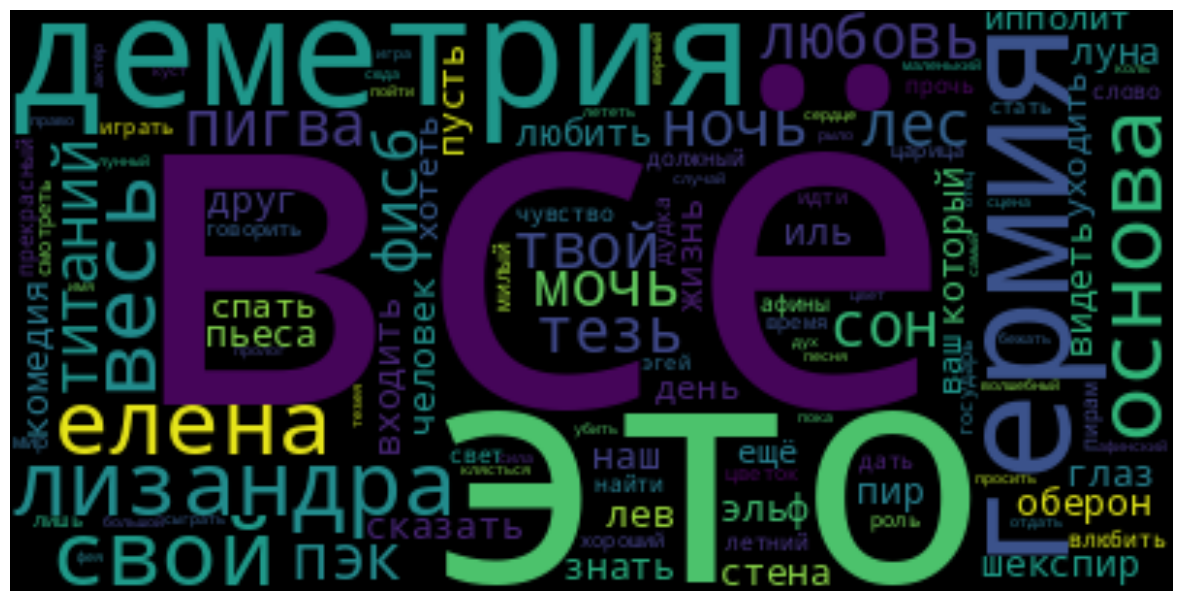

In [131]:
viz=res['WordSt_11Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")